In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/5948835387_5a98d39eff_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14114116486_0bb6649bc1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/450128527_fd35742d44.jpg'),
 PosixPath('datasets/flower_photos/daisy/8094774544_35465c1c64.jpg'),
 PosixPath('datasets/flower_photos/daisy/8383753520_8391dd80ee_m.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8949720453_66e8304c30.jpg'),
 PosixPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5249566718_6109630c83_m.jpg')]

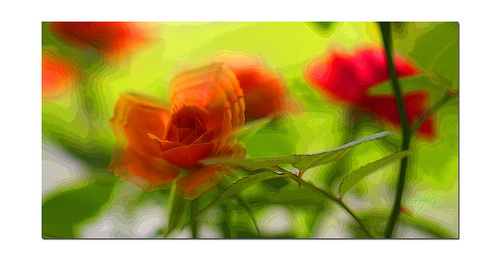

In [7]:
PIL.Image.open(str(roses[1]))

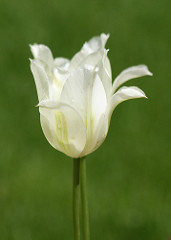

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

array([[[113, 165, 205],
        [110, 162, 202],
        [105, 160, 199],
        ...,
        [ 96, 170, 218],
        [ 96, 170, 218],
        [ 96, 170, 218]],

       [[113, 165, 205],
        [110, 162, 202],
        [105, 160, 199],
        ...,
        [ 96, 170, 218],
        [ 95, 169, 217],
        [ 95, 169, 217]],

       [[113, 165, 205],
        [110, 162, 202],
        [105, 160, 199],
        ...,
        [ 95, 168, 218],
        [ 94, 167, 217],
        [ 94, 167, 217]],

       ...,

       [[ 84, 144, 186],
        [ 92, 152, 194],
        [101, 161, 203],
        ...,
        [ 91, 158, 203],
        [ 71, 139, 186],
        [ 76, 143, 192]],

       [[ 98, 157, 197],
        [ 80, 138, 180],
        [ 60, 118, 160],
        ...,
        [103, 171, 218],
        [ 88, 155, 204],
        [ 75, 144, 193]],

       [[ 88, 143, 186],
        [ 57, 112, 155],
        [ 63, 118, 161],
        ...,
        [106, 176, 223],
        [100, 169, 218],
        [ 77, 146, 196]]], dtype=uint8)
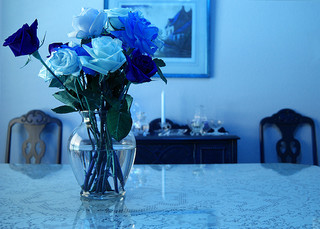

In [14]:
img

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",input_shape=(180,180,3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.3101 - loss: 1.7371
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5381 - loss: 1.0988
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6195 - loss: 0.9987
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6699 - loss: 0.8731
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6711 - loss: 0.8492


In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.6243 - loss: 0.9133


[0.8810572624206543, 0.6405228972434998]

In [34]:
import joblib

In [35]:
joblib.dump(model,'flower_model')

['flower_model']